In [3]:
import pandas as pd

# Lire le fichier avec des doubles barres obliques inverses
data = pd.read_csv('Data\\AmesHousing.txt', delimiter='\t')
data


ModuleNotFoundError: No module named 'pandas'

In [37]:
#Sélectionner les 1460__ premières lignes de __data__ et les assigner à la variable __train.
train=data.iloc[:1460]
# Sélectionner les lignes restantes pour l'ensemble de test
test=data.iloc[1460:]
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [38]:
# Déterminer la colonne cible 
target = 'SalePrice'

1- Régréssion linéaire simple

<Axes: xlabel='Garage Area', ylabel='SalePrice'>

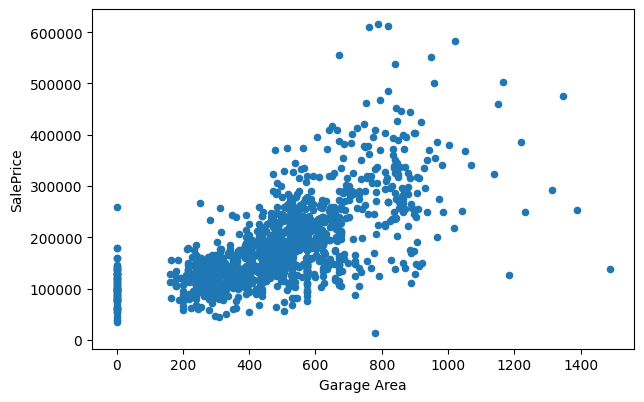

In [39]:
import matplotlib.pyplot as plt
fig0 = plt.figure(figsize=(7,15))# figsize définit la taille de la figure en pouces

ax0 = fig0.add_subplot(3,1,1)
train.plot(x='Garage Area', y='SalePrice', ax=ax0, kind='scatter')



<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

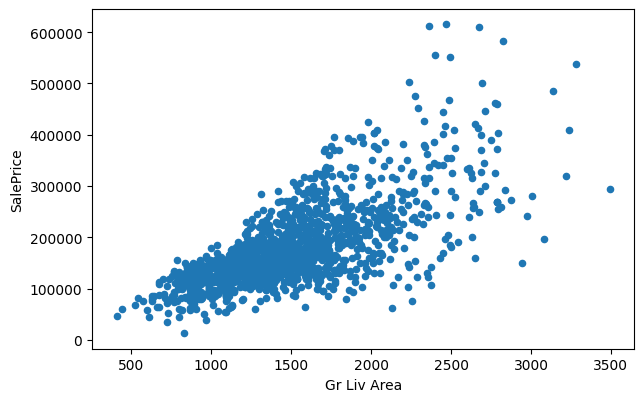

In [40]:
fig1=plt.figure(figsize=(7,15))

ax1=fig1.add_subplot(3,1,1)
train.plot(x='Gr Liv Area',y='SalePrice',ax=ax1,kind='scatter')

<Axes: xlabel='Overall Cond', ylabel='SalePrice'>

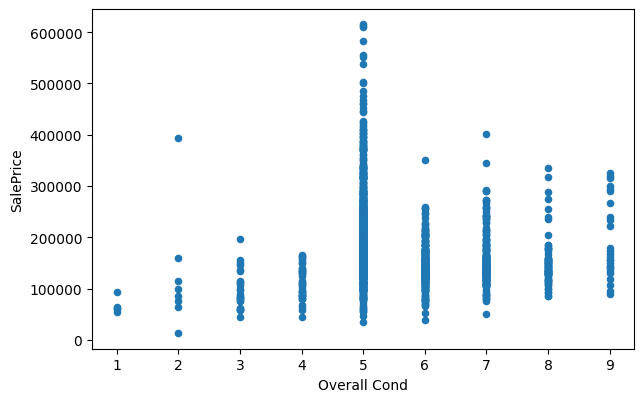

In [41]:
fig3=plt.figure(figsize=(7,15))

ax3=fig3.add_subplot(3,1,1)
train.plot(x='Overall Cond',y='SalePrice',ax=ax3,kind='scatter')

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data[['Gr Liv Area']]  
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)

a1 = lr.coef_[0]  # y=a1*x +a0

a0 = lr.intercept_
print(a1,a0)


106.72915508271505 19250.559555372573


Utiliser le modèle entrainé pour faire des prédictions à la fois sur les sets de train et test.


In [43]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Prédire sur l'ensemble d'entraînement
y_train_pred = lr.predict(X_train)

# Prédire sur l'ensemble de test
y_test_pred = lr.predict(X_test)

# Afficher quelques prédictions pour l'ensemble d'entraînement et de test
print("Predictions on training set:", y_train_pred[:5] ,"\n")  # Afficher les 5 premières prédictions
print("Predictions on test set:", y_test_pred[:5])  # Afficher les 5 premières prédictions
#pourquoi les predictions  sur train et test et non pas seulrmrnt sur test?=>pour savoir si le modele generalise bien ou pas
 

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Training RMSE:", train_rmse)

# Calculer le RMSE pour l'ensemble de test
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE:", test_rmse)


Predictions on training set: [165469.50201869 246156.74326122 149887.04537662 130248.8808414
 200796.85235107] 

Predictions on test set: [197061.33192318 129181.58929057 203251.62291797 124912.42308726
 117334.65307639]
Training RMSE: 55193.58815476658
Test RMSE: 61815.72669048421


In [ ]:

lr=LinearRegression()
lr.fit(X_train,y_train)

# Prédire sur l'ensemble d'entraînement
y_train_pred = lr.predict(X_train)

# Prédire sur l'ensemble de test
y_test_pred = lr.predict(X_test)

train_rmse2 = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Training RMSE:", train_rmse2)

# Calculer le RMSE pour l'ensemble de test
test_rmse2 = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE:", test_rmse2)


Training RMSE: 55158.317168013455
Test RMSE: 61838.17505672636


Partie 2
Gradient Descent

In [46]:
def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial):
    a1_list = [a1_initial]
    
    for i in range(0, max_iterations):
        a1 = a1_list[i]
        deriv = derivative(a1, xi_list, yi_list)
        a1_new = a1 - alpha*deriv
        a1_list.append(a1_new)
    return(a1_list)

def derivative(a1, xi_list, yi_list):
    n = len(xi_list)  # Number of samples
    deriv_sum = 0  # Sum of derivatives

    # Calculate the sum of the derivatives for each data point
    for i in range(n):
        xi = xi_list[i]  # Current input feature
        yi = yi_list[i]  # Current target value
        yi_pred = a1 * xi  # Linear model prediction (y = a1 * x)
        deriv_sum += (yi_pred - yi) * xi  # Derivative for this point

    # Return the average of the derivative (normalized)
    return (2 / n) * deriv_sum


In [47]:
# Define your data (example data)
xi_list = [1, 2, 3, 4, 5]  # Example input feature values
yi_list = [2, 4, 6, 8, 10]  # Example target values

# Parameters for gradient descent
max_iterations = 1000  # Number of iterations
alpha = 0.01           # Learning rate
a1_initial = 0         # Initial value of the slope

# Execute the gradient_descent function
param_iterations = gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial)

# Assign the last iteration of a1 to final_param
final_param = param_iterations[-1]

# Output the results
print("List of a1 iterations:", param_iterations)
print("Final a1 value after gradient descent:", final_param)


List of a1 iterations: [0, 0.44, 0.7832, 1.050896, 1.25969888, 1.4225651263999999, 1.549600798592, 1.6486886229017599, 1.7259771258633727, 1.7862621581734308, 1.833284483375276, 1.8699618970327152, 1.898570279685518, 1.920884818154704, 1.938290158160669, 1.951866323365322, 1.9624557322249512, 1.970715471135462, 1.9771580674856604, 1.982183292638815, 1.9861029682582756, 1.989160315241455, 1.9915450458883348, 1.9934051357929012, 1.994856005918463, 1.995987684616401, 1.9968703940007928, 1.9975589073206184, 1.9980959477100824, 1.9985148392138643, 1.9988415745868142, 1.999096428177715, 1.9992952139786178, 1.9994502669033218, 1.999571208184591, 1.999665542383981, 1.9997391230595052, 1.999796515986414, 1.999841282469403, 1.9998762003261343, 1.9999034362543848, 1.99992468027842, 1.9999412506171677, 1.9999541754813908, 1.9999642568754847, 1.9999721203628782, 1.999978253883045, 1.999983038028775, 1.9999867696624445, 1.9999896803367068, 1.9999919506626314, 1.9999937215168524, 1.9999951027831449, 